# Explore here

# ÍNDICE

1. [CARGA DE DATOS Y PRIMERAS IMPRESIONES](#1-carga-de-datos-y-primeras-impresiones)  
2. [LIMPIEZA Y TRATAMIENTO DE NULOS](#2-limpieza-y-tratamiento-de-nulos)  
3. [ANÁLISIS UNIVARIADO (UNIVARIANTE)](#3-análisis-univariado-univariante)  
   - [3.1: Categóricas](#31-categóricas)  
   - [3.2: Numéricas](#32-numéricas)  
4. [ANÁLISIS BIVARIADO O MULTIVARIANTE](#4-análisis-bivariado-o-multivariante)  
   - [4.1 Numérico-numérico](#41-numérico-numérico)  
   - [4.2 Categórico-categórico](#42-categórico-categórico)  
5. [ANÁLISIS DE CORRELACIONES](#5-análisis-de-correlaciones)  
6. [OUTLIERS (VALORES ATÍPICOS)](#6-outliers-valores-atípicos)  
7. [FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"](#7-feature-engineering-escalado-y-normalización-de-valores)  
   - [7.1 Normalización](#71-normalización)  
   - [7.2 Escalado mín-max](#72-escalado-mín-max)
8. [MODELO DE ÁRBOL DE DECISIÓN](#8-modelo-de-arbol-de-decisión)


## 1. CARGA DE DATOS Y PRIMERAS IMPRESIONES ##

In [2]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [3]:
total_data.shape

(768, 9)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. LIMPIEZA Y TRATAMIENTO DE NULOS ##

In [5]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1


## No hemos quitado ninguna

In [6]:
total_data.shape

(768, 9)

# 3. ANÁLISIS UNIVARIADO (UNIVARIANTE)

3.1 CATEGÓRICAS:

No hay

3.2 NUMÉRICAS:

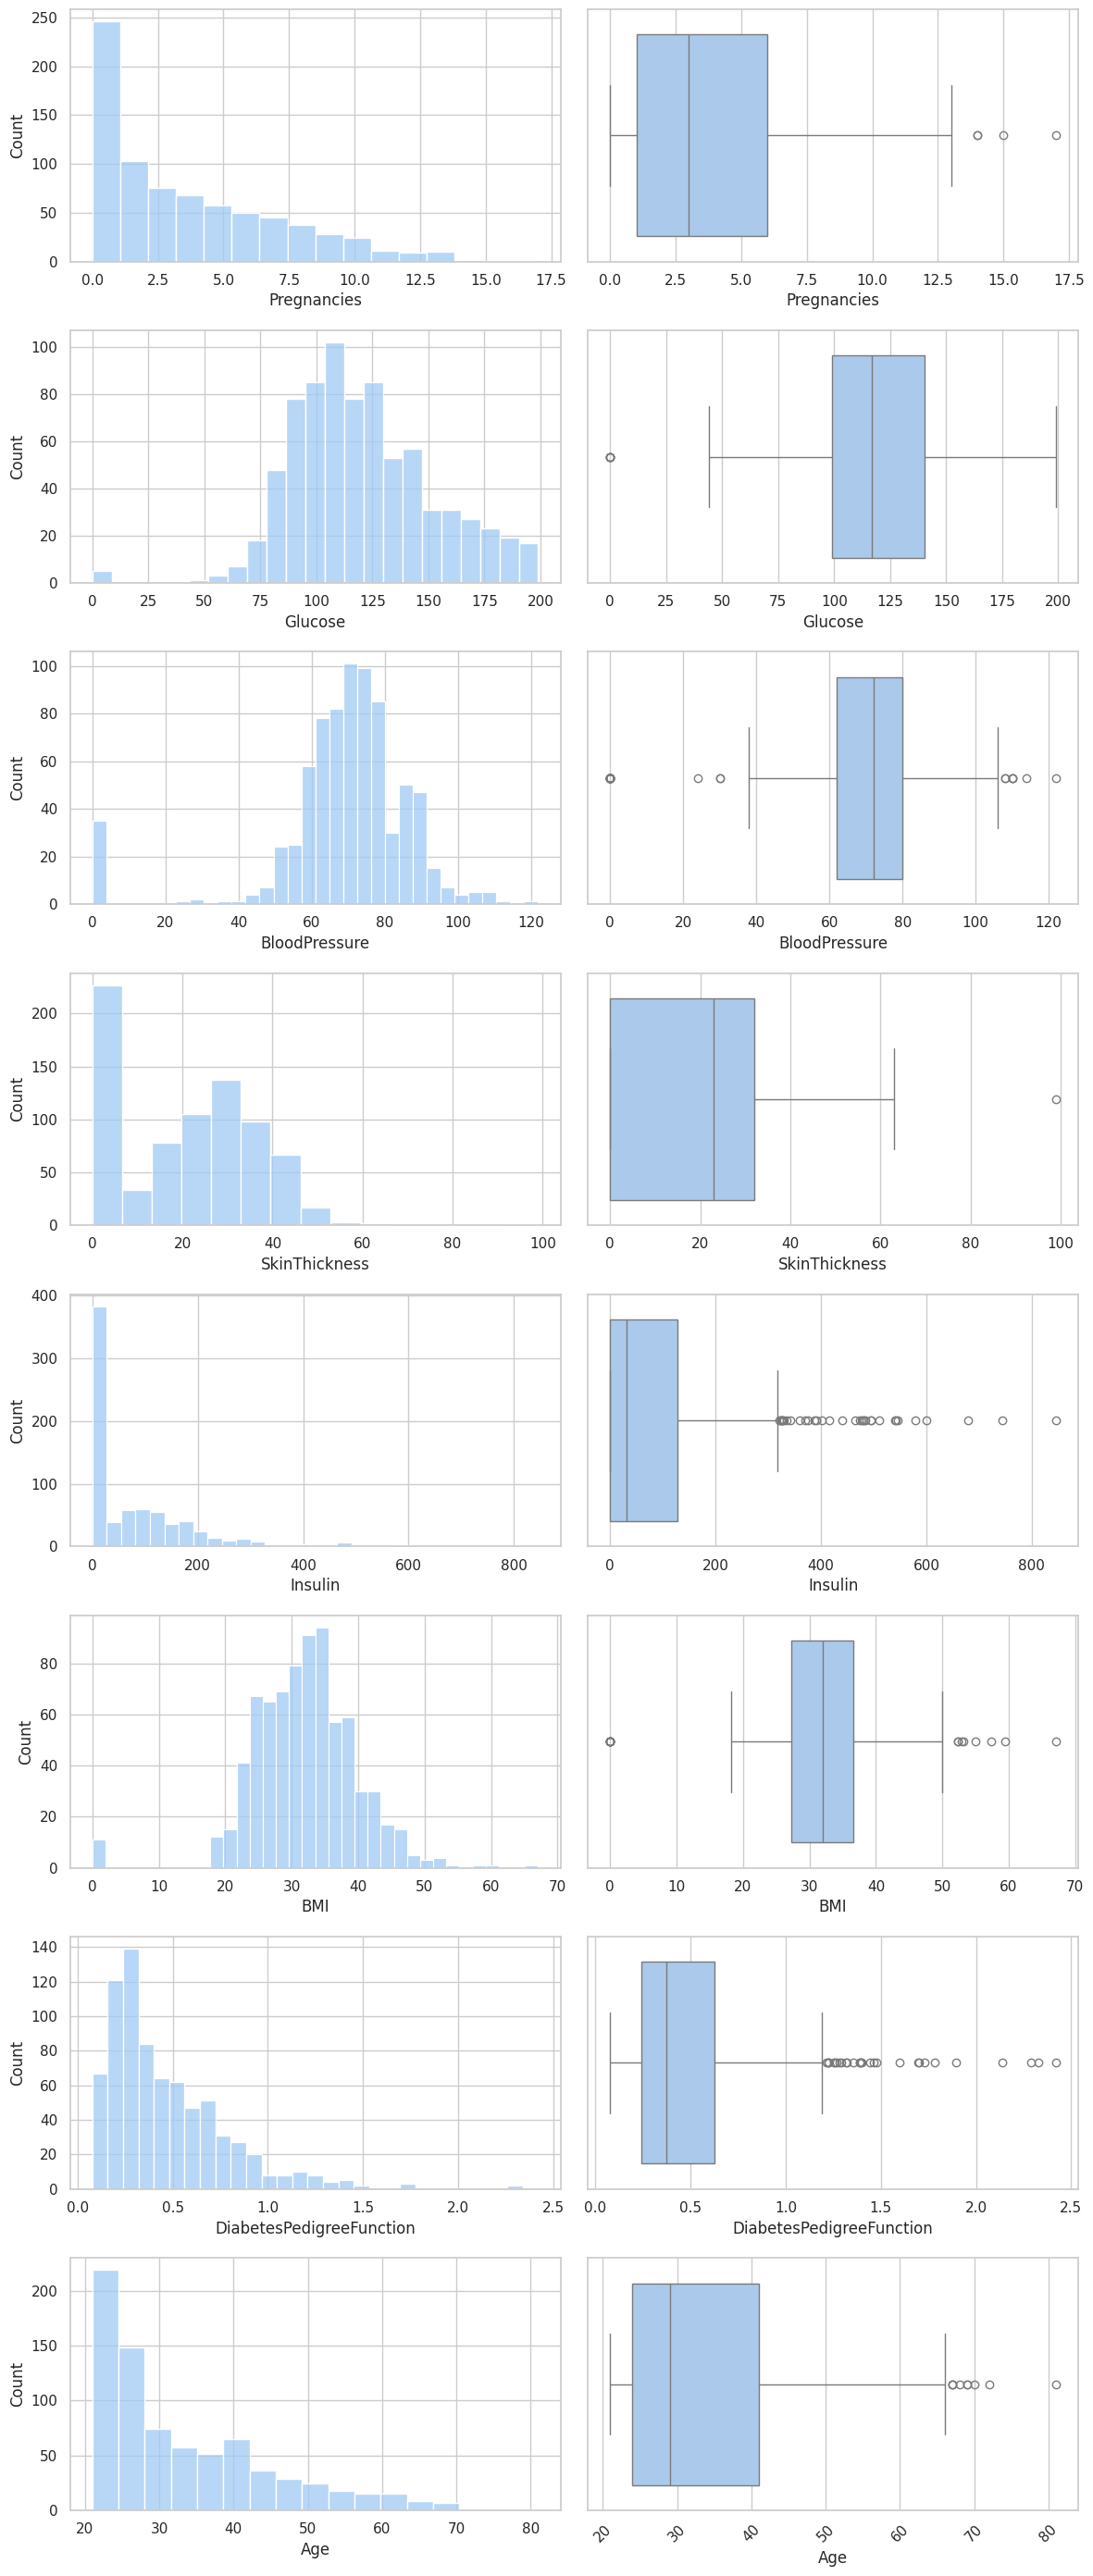

In [7]:
fig, axis = plt.subplots(8, 2, figsize=(12, 28))

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[0, 1], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[1, 0], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[2, 1], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[3, 0], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[4, 0], data=total_data, x="Insulin")
sns.boxplot(ax=axis[4, 1], data=total_data, x="Insulin")

sns.histplot(ax=axis[5, 0], data=total_data, x="BMI")
sns.boxplot(ax=axis[5, 1], data=total_data, x="BMI")

sns.histplot(ax=axis[6, 0], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[6, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[7, 0], data=total_data, x="Age")
sns.boxplot(ax=axis[7, 1], data=total_data, x="Age")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. ANÁLISIS BIVARIADO O MULTIVARIANTE 

4.1 NUMÉRICO-NUMÉRICO

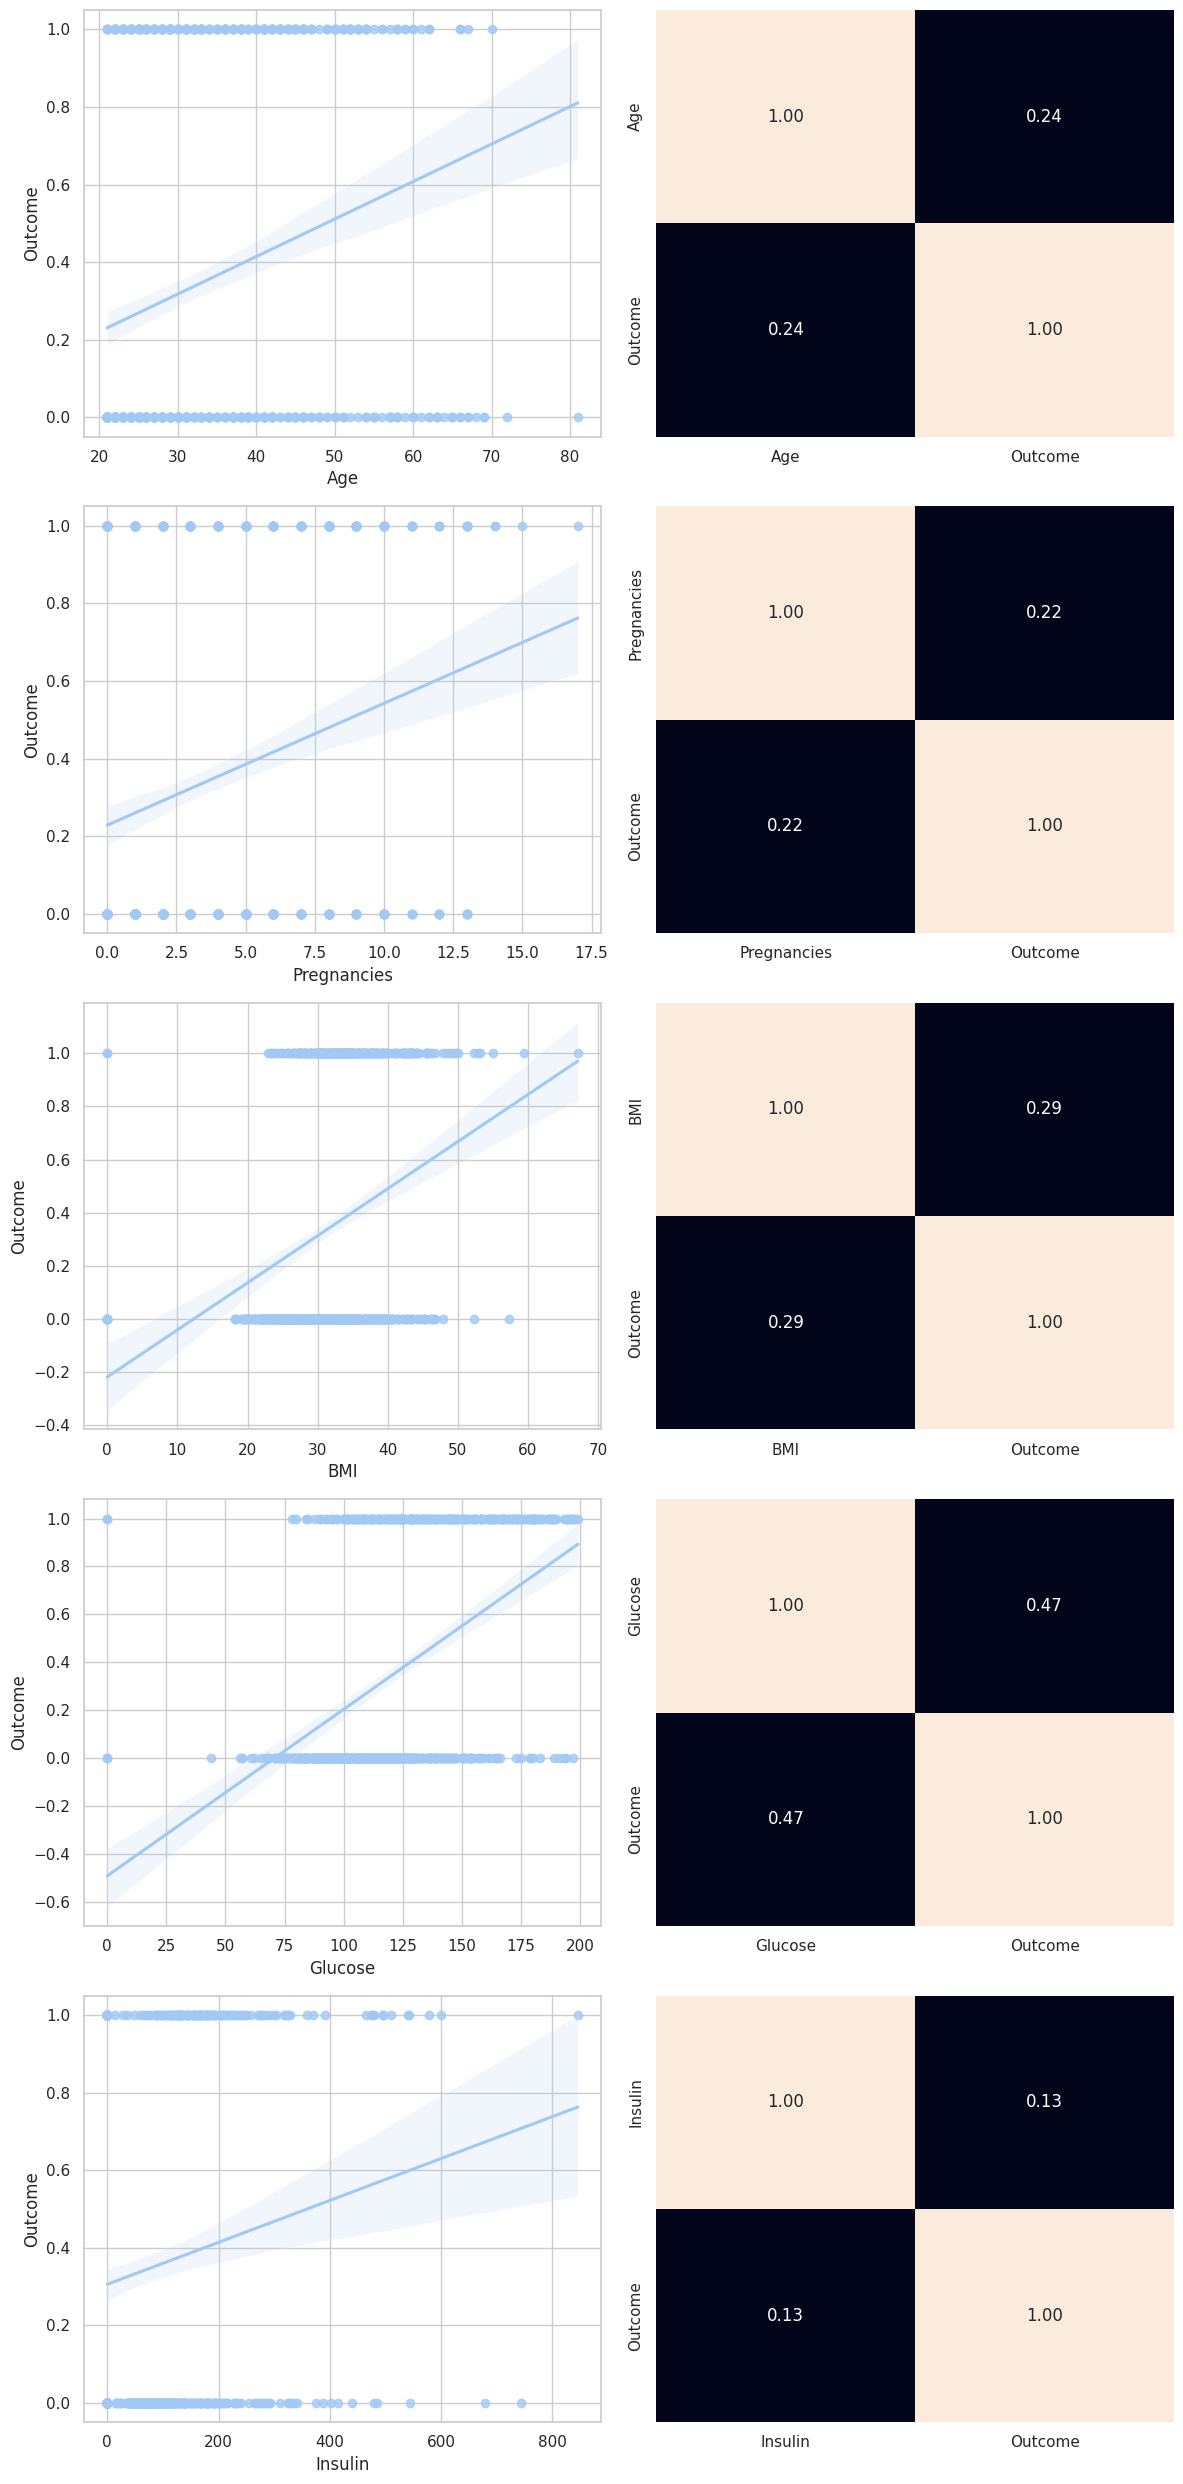

In [8]:
fig, axis = plt.subplots(5, 2, figsize=(12, 25))

sns.regplot(ax=axis[0, 0], data=total_data, x="Age", y="Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(ax=axis[1, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BMI", y="Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(ax=axis[3, 0], data=total_data, x="Glucose", y="Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=total_data, x="Insulin", y="Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)

plt.tight_layout()
plt.show()


4.2 CATEGÓRICO-CATEGÓRICO

##No hay

4.3 Combinaciones de la clase con varias predictoras

In [9]:
top_10_charges = total_data['BMI'].value_counts().nlargest(10).index
filtered_data = total_data[total_data['BMI'].isin(top_10_charges)]

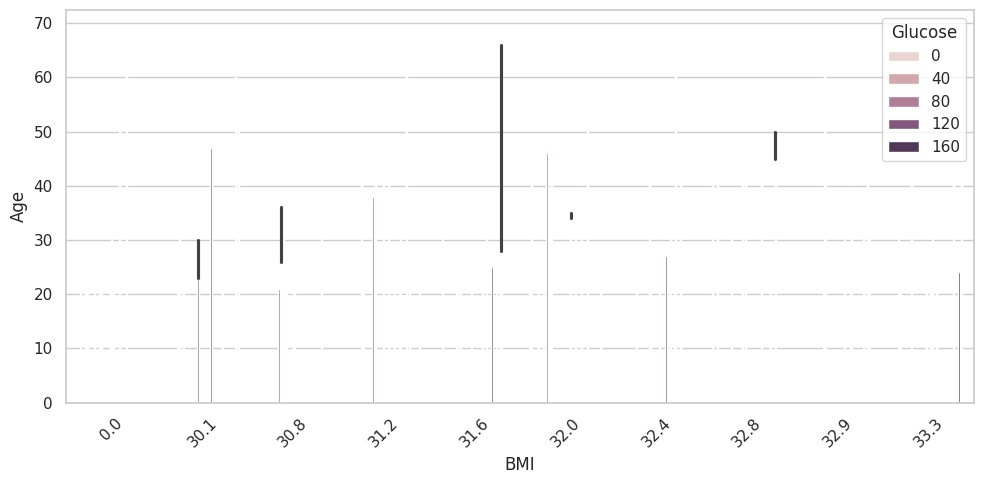

In [10]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = filtered_data, x = "BMI", y = "Age", hue = "Glucose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. ANÁLISIS DE CORRELACIONES

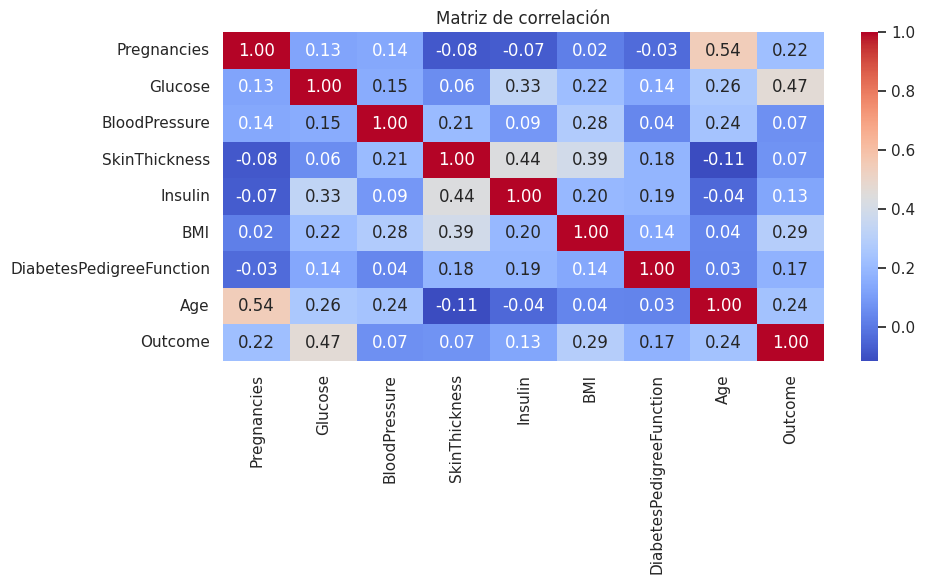

In [11]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks()
plt.tight_layout()

plt.show()

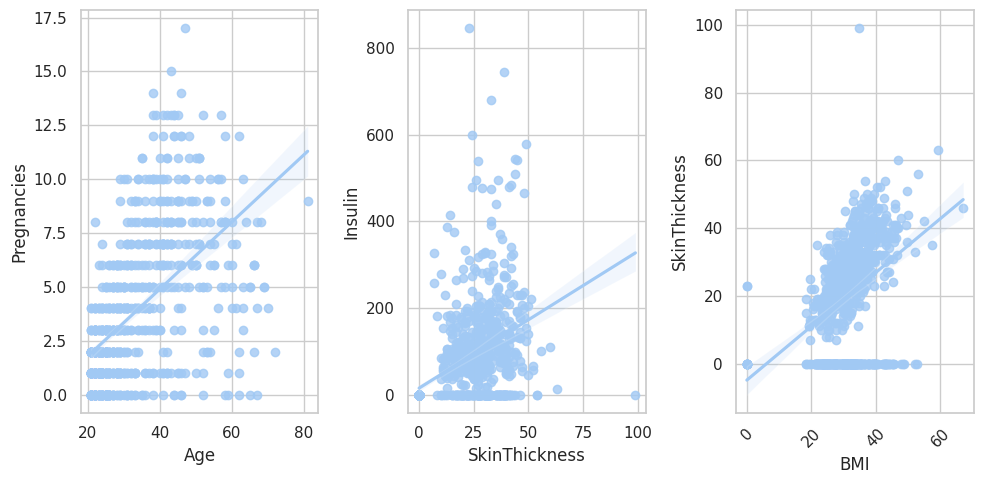

In [12]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pregnancies")
sns.regplot(ax = axis[1], data = total_data, x = "SkinThickness", y = "Insulin")
sns.regplot(ax = axis[2], data = total_data, x = "BMI", y = "SkinThickness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

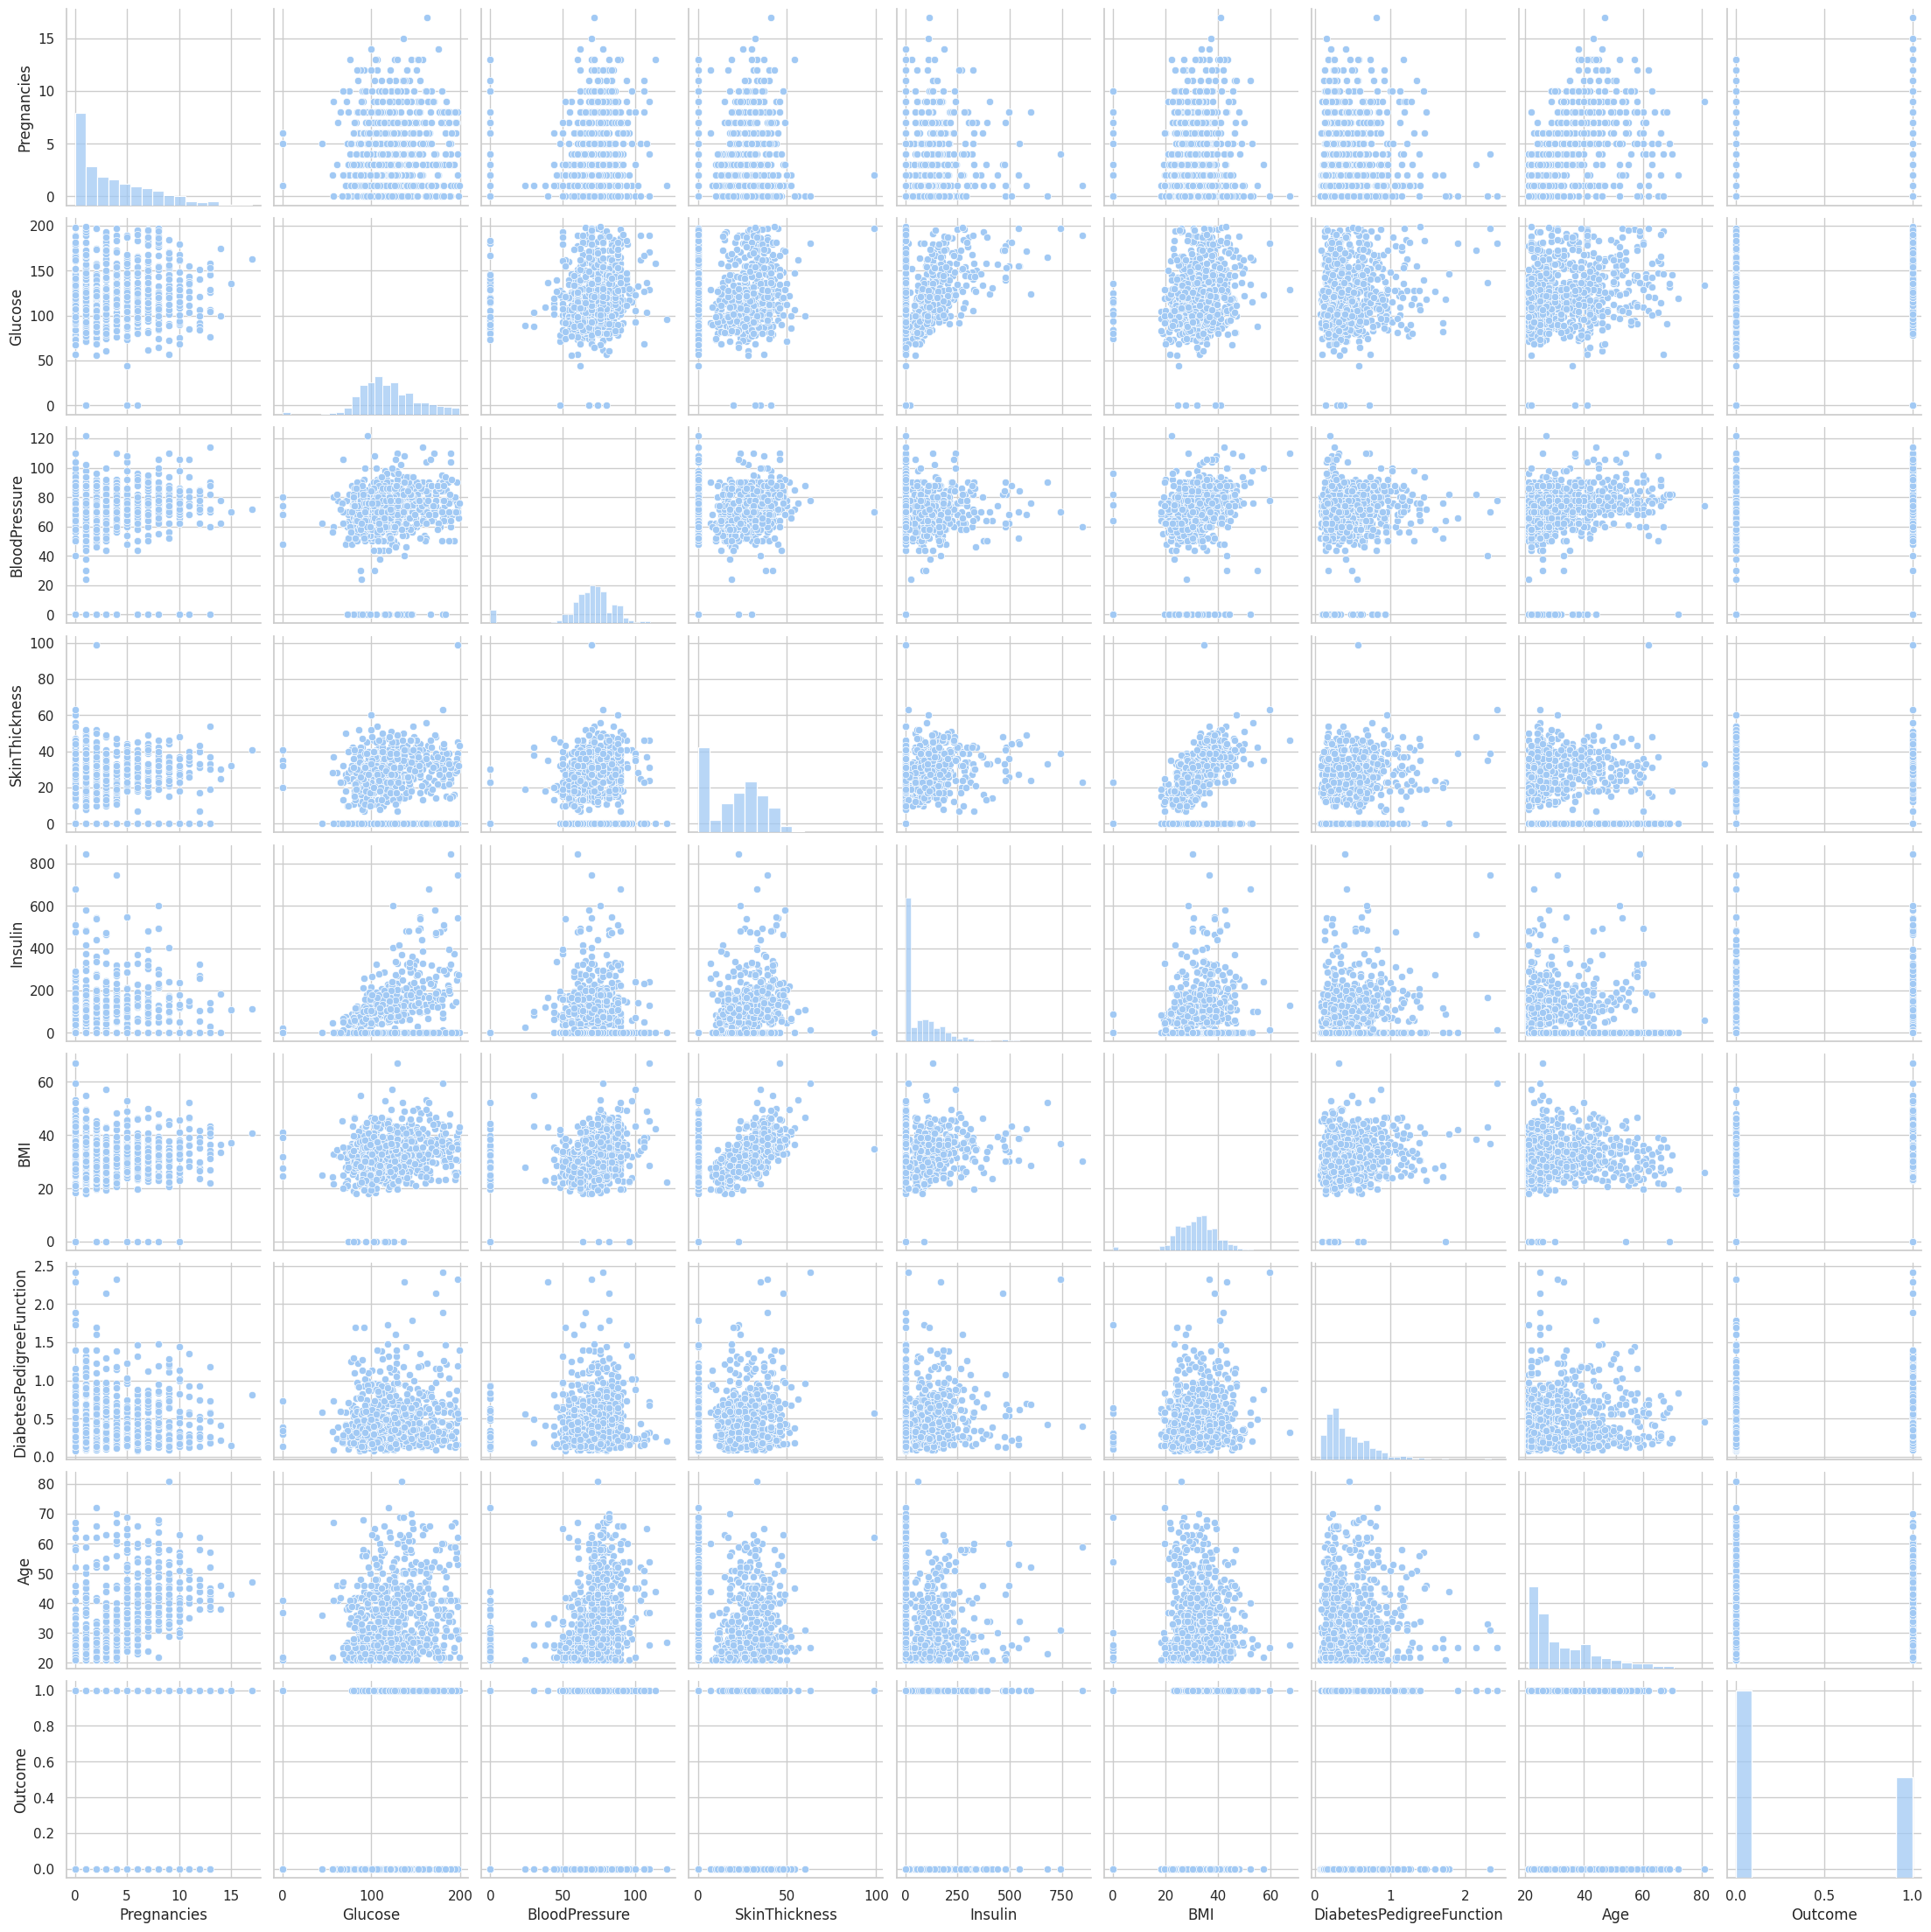

In [13]:
sns.pairplot(data = total_data)

In [14]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


# 6. OUTLIERS (VALORES ATÍPICOS)

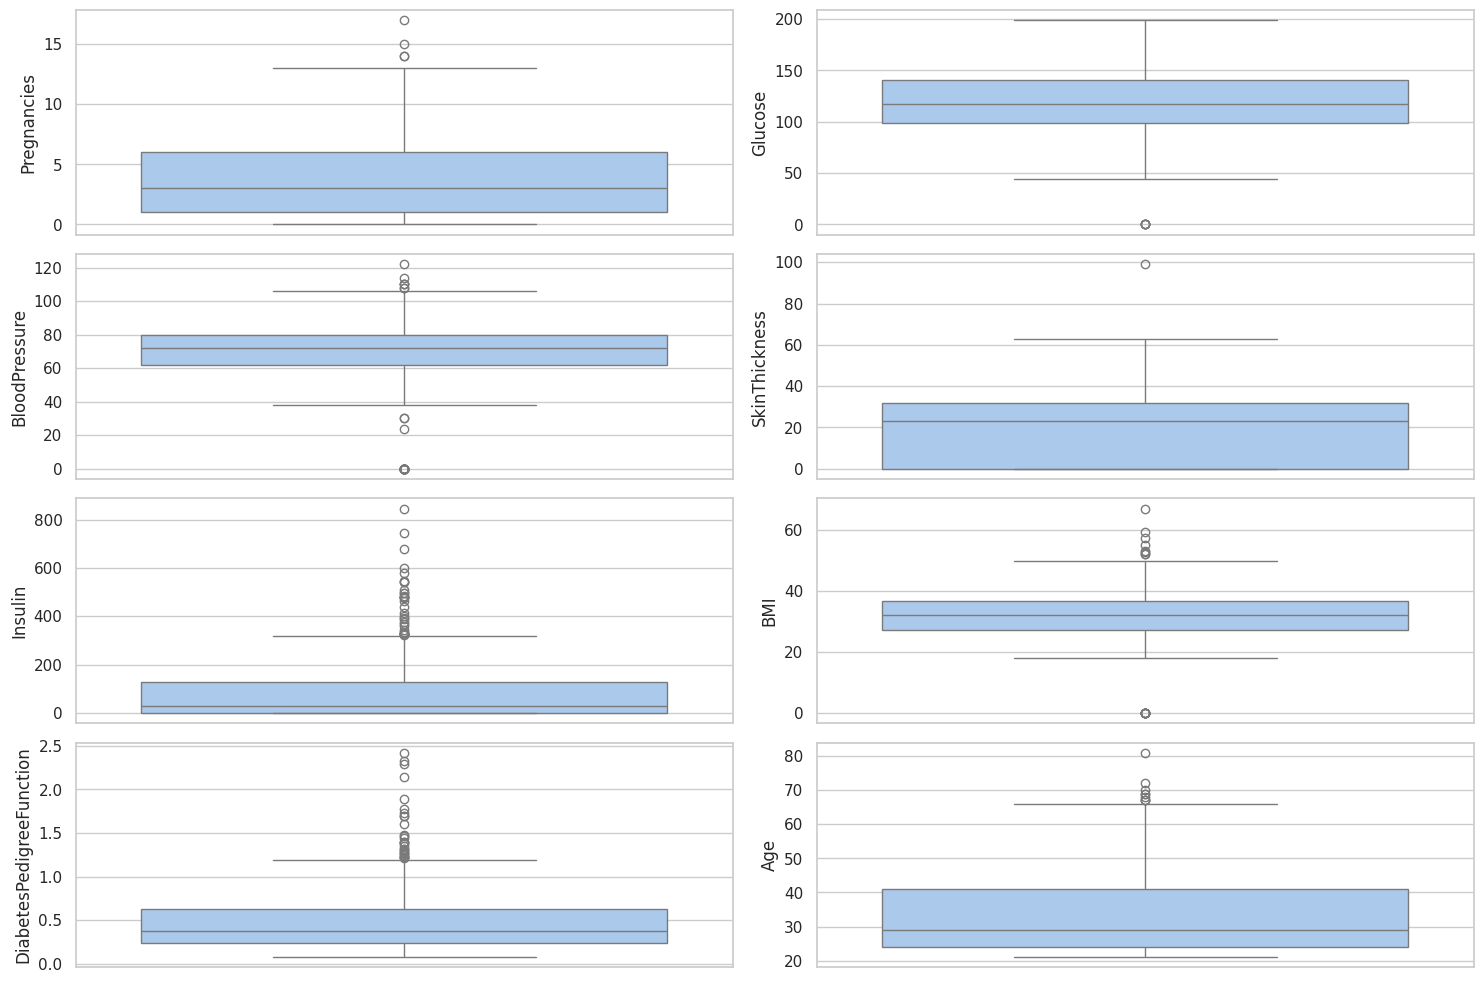

In [15]:

fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[1,0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[3,0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Age")


plt.tight_layout()

plt.show()

In [16]:
numerical_columns = [
  "Pregnancies",  
  "Glucose", 
  "BloodPressure", 
  "SkinThickness", 
  "Insulin",  
  "BMI", 
  "DiabetesPedigreeFunction", 
  "Age", 
  "Outcome"
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y 0, con un rango intercuartílico de 5.0
Los límites superior e inferior para la búsqueda de outliers son 80.0 y 0, con un rango intercuartílico de 32.0
Los límites superior e inferior para la búsqueda de outliers son 318.12 y 0, con un rango intercuartílico de 127.25
Los límites superior e inferior para la búsqueda de outliers son 2.5 y 0, con un rango intercuartílico de 1.0


In [17]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["Insulin", "SkinThickness"]:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Insulin': [0, np.float64(318.125)], 'SkinThickness': [0, np.float64(80.0)]}

In [18]:
total_data_CON_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1


In [19]:
total_data_SIN_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.63,50,1
1,1,85,66,29.0,0.0,26.6,0.35,31,0
2,8,183,64,0.0,0.0,23.3,0.67,32,1
3,1,89,66,23.0,94.0,28.1,0.17,21,0
4,0,137,40,35.0,168.0,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.17,63,0
764,2,122,70,27.0,0.0,36.8,0.34,27,0
765,5,121,72,23.0,112.0,26.2,0.24,30,0
766,1,126,60,0.0,0.0,30.1,0.35,47,1


In [20]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# 7. FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"

In [23]:
from sklearn.model_selection import train_test_split

num_variables = [
  "Pregnancies",  
  "Glucose", 
  "BloodPressure", 
  "SkinThickness", 
  "Insulin",  
  "BMI", 
  "DiabetesPedigreeFunction", 
  "Age", 
  ]


X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.30,21
618,9,112,82,24,0,28.2,1.28,50
346,1,139,46,19,83,28.7,0.65,22
294,0,161,50,0,0,21.9,0.25,65
231,6,134,80,37,370,46.2,0.24,46


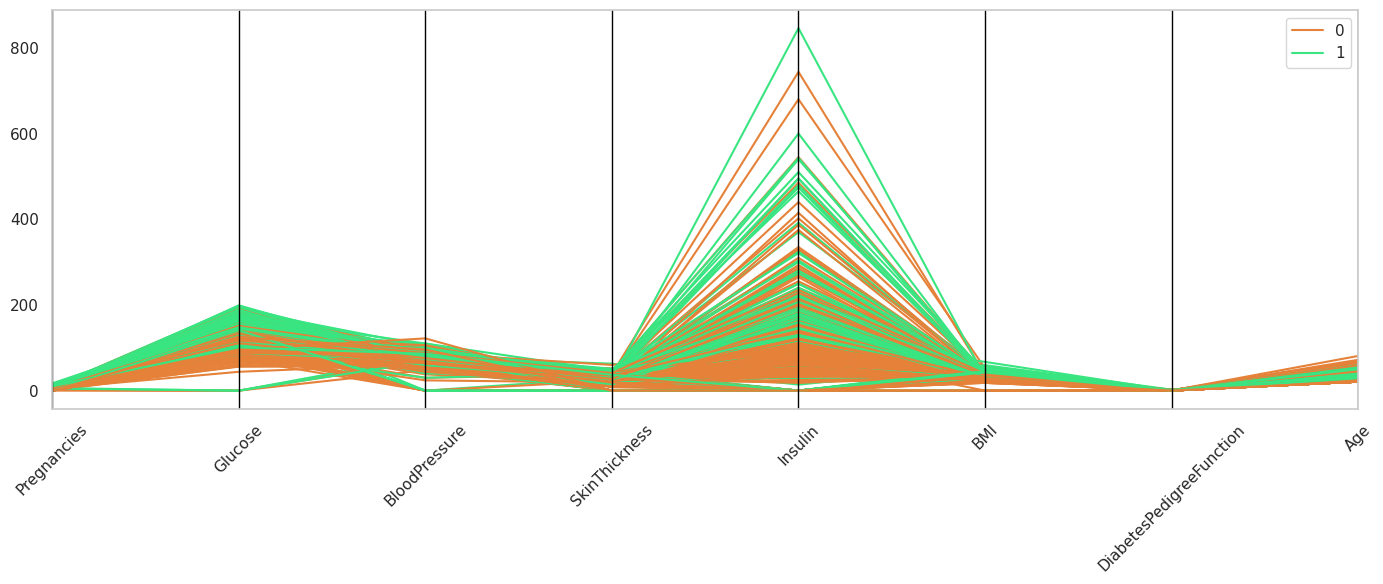

In [34]:
plt.figure(figsize=(14, 6))

columns = [
    "Pregnancies",  
    "Glucose", 
    "BloodPressure", 
    "SkinThickness", 
    "Insulin",  
    "BMI", 
    "DiabetesPedigreeFunction", 
    "Age"
]

total_data = pd.DataFrame(X_train_con_outliers, columns=columns)

total_data["Outcome"] = y_train

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

7.1 NORMALIZACIÓN:

In [47]:
from sklearn.preprocessing import StandardScaler
import pickle

num_variables = [  "Pregnancies",
  "Glucose",
  "BloodPressure",
  "SkinThickness",
  "Insulin",
  "BMI",
  "DiabetesPedigreeFunction",
  "Age",
  ]
  
X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.30,21
618,9,112,82,24,0,28.2,1.28,50
346,1,139,46,19,83,28.7,0.65,22
294,0,161,50,0,0,21.9,0.25,65
231,6,134,80,37,370,46.2,0.24,46


In [49]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)
X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)

X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)
X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.53,-1.15,-3.75,-1.32,-0.70,-4.14,-0.49,-1.04
618,1.59,-0.28,0.68,0.23,-0.70,-0.49,2.42,1.49
346,-0.83,0.57,-1.27,-0.09,0.01,-0.42,0.55,-0.95
294,-1.13,1.25,-1.05,-1.32,-0.70,-1.30,-0.64,2.79
231,0.68,0.41,0.57,1.08,2.48,1.84,-0.69,1.14


7.2 ESCALADO MÍN-MAX:

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.12,0.42,0.00,0.00,0.00,0.00,0.10,0.00
618,0.53,0.56,0.67,0.38,0.00,0.42,0.51,0.48
346,0.06,0.70,0.38,0.30,0.10,0.43,0.25,0.02
294,0.00,0.81,0.41,0.00,0.00,0.33,0.08,0.73
231,0.35,0.67,0.66,0.59,0.44,0.69,0.07,0.42


In [56]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def best_k(x_train, y_train):
    scores = []    
    
    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)
        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)
    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k
k = best_k(X_train_sin_outliers_scal, y_train)
print (k)

selection_model = SelectKBest(f_classif, k = k)
selection_model.fit(X_train_con_outliers, y_train)
ix = selection_model.get_support()
X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

7


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.30,21.0
1,9.0,112.0,82.0,0.0,28.2,1.28,50.0
2,1.0,139.0,46.0,83.0,28.7,0.65,22.0
3,0.0,161.0,50.0,0.0,21.9,0.25,65.0
4,6.0,134.0,80.0,370.0,46.2,0.24,46.0


In [57]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_sin_outliers, y_train)
ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])
X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,0.0,21.0
1,9.0,112.0,28.2,50.0
2,1.0,139.0,28.7,22.0
3,0.0,161.0,21.9,65.0
4,6.0,134.0,46.2,46.0


In [58]:
X_train_con_outliers_norm_sel = X_train_con_outliers_norm[X_train_con_outliers_sel.columns]
X_train_sin_outliers_norm_sel = X_train_sin_outliers_norm[X_train_sin_outliers_sel.columns]
X_test_con_outliers_norm_sel = X_test_con_outliers_norm[X_test_con_outliers_sel.columns]
X_test_sin_outliers_norm_sel = X_test_sin_outliers_norm[X_test_sin_outliers_sel.columns]

SkinThickness se elimina del dataset

In [29]:
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.00,0.0,0.30,21.0
1,9.0,112.0,82.0,0.00,28.2,1.28,50.0
2,1.0,139.0,46.0,83.00,28.7,0.65,22.0
3,0.0,161.0,50.0,0.00,21.9,0.25,65.0
4,6.0,134.0,80.0,318.12,46.2,0.24,46.0


In [59]:
X_train_con_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)


X_train_con_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_norm_sel.csv", index=False)
X_train_sin_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_norm_sel.csv", index=False)
X_test_con_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_norm_sel.csv", index=False)
X_test_sin_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_norm_sel.csv", index=False)

X_train_con_outliers_scal_sel = X_train_con_outliers_scal[X_train_con_outliers_sel.columns]
X_train_sin_outliers_scal_sel = X_train_sin_outliers_scal[X_train_sin_outliers_sel.columns]
X_test_con_outliers_scal_sel = X_test_con_outliers_scal[X_test_con_outliers_sel.columns]
X_test_sin_outliers_scal_sel = X_test_sin_outliers_scal[X_test_sin_outliers_sel.columns]

X_train_con_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_scal_sel.csv", index=False)
X_train_sin_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_scal_sel.csv", index=False)
X_test_con_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_scal_sel.csv", index=False)
X_test_sin_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_scal_sel.csv", index=False)

# 8. MODELO DE ÁRBOL DE DECISIÓN

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = DecisionTreeClassifier(random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    mse = mean_squared_error(y_train, y_pred)
    mse_results.append(mse)
    
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

MSE: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Menor MSE: 0.0


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy)

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8094462540716613, 0.8143322475570033, 0.8094462540716613, 0.8143322475570033, 0.8094462540716613, 0.8143322475570033]
Mejor Accuracy: 0.8143322475570033


In [66]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_sin_outliers_norm, y_train)
y_pred_test = model.predict(X_test_sin_outliers_norm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)


Accuracy en test: 0.7402597402597403


In [67]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"El MSE en test es {mse_test}")


El MSE en test es 0.2597402597402597


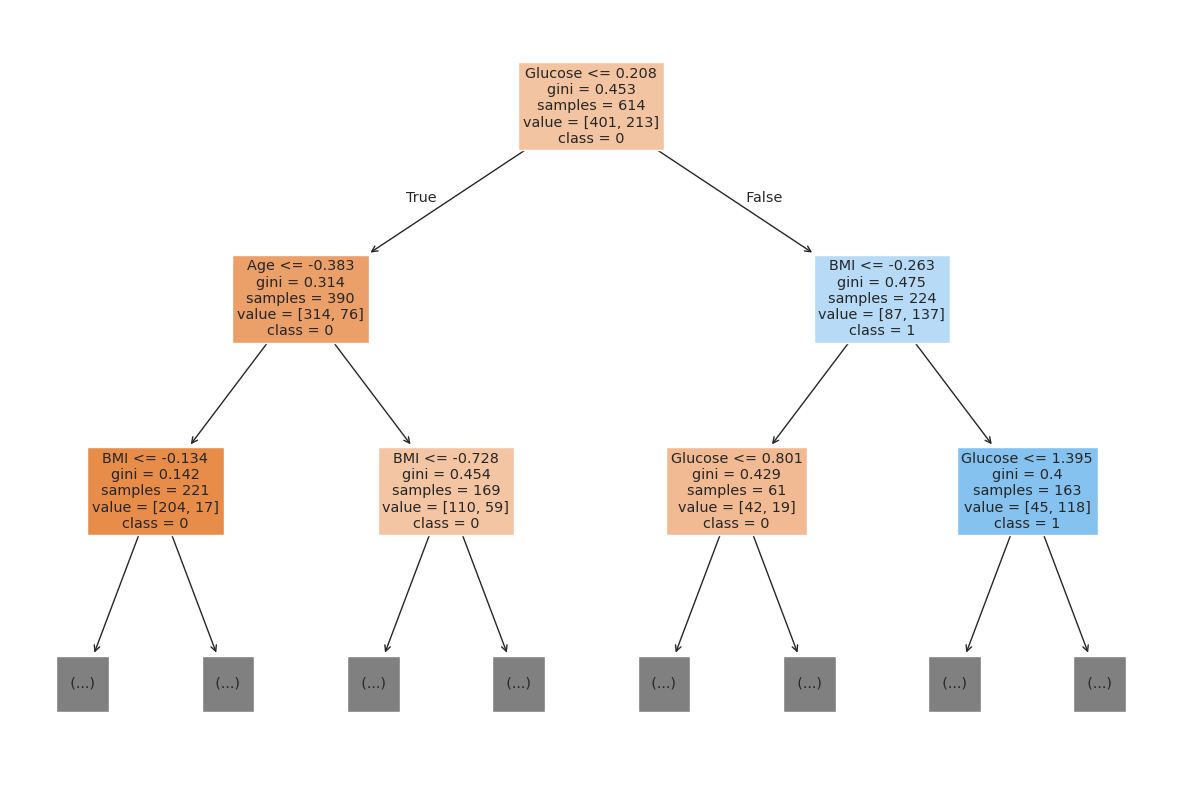

In [73]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))  

tree.plot_tree(
    model,
    feature_names=list(X_train_sin_outliers_norm.columns),
    class_names=["0", "1"],
    filled=True,
    max_depth=2  #Se ha hecho prueba sin estas características y no se podía visualizar el gráfico correctamente, por eso he elegido max_depth para la visualización
)

plt.show()



In [74]:
plt.savefig("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/arbol_decision.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [75]:
from pickle import dump

dump(model, open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/decision_tree_classifier_default_42.sav", "wb"))
